In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import locale
locale.setlocale(locale.LC_ALL, 'italian') # used to set months names in italian 

from windrose import WindroseAxes

In [2]:
df = pd.read_csv("windRose/wind_t0129_giornaliero.csv" , sep=",", index_col=0,
                skiprows=[0,1,3], usecols=[1,3])

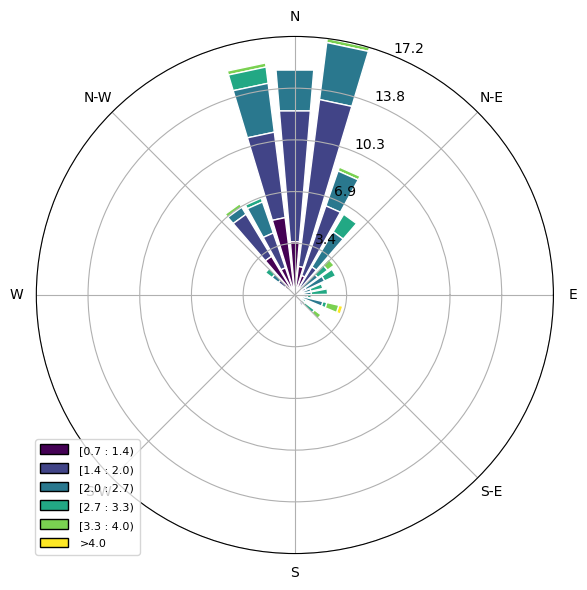

In [4]:
fig= plt.figure(figsize=(6,6), tight_layout=True)
ax = fig.add_subplot(projection="windrose")
#ax = WindroseAxes.from_ax()
ax.bar(df.dirVento.values, df.velVento.values, 
        normed=True, opening=0.8, edgecolor="white", nsector=30)
ax.set_legend()
#fig.savefig("export/windRose.pdf")

In [5]:
STOP

NameError: name 'STOP' is not defined

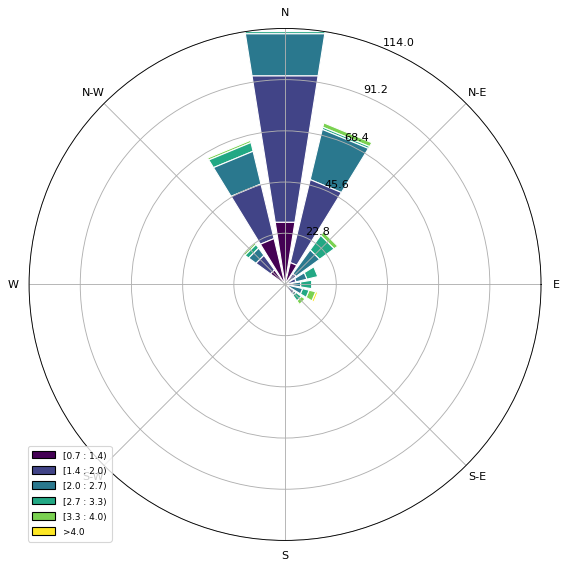

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(df.dirVento, df.velVento, opening=0.8, edgecolor="white")
ax.set_legend()

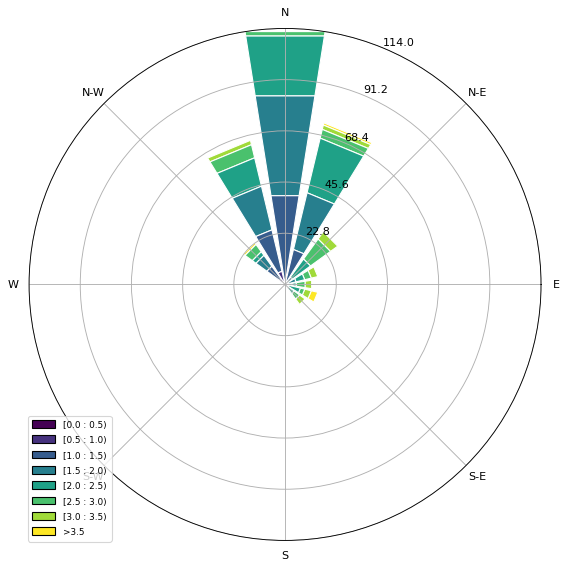

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(df.dirVento, df.velVento, bins=np.arange(0,4,.5), edgecolor="white")
ax.set_legend()

Trento laste da ottobre 2012 a ottobre 2022, valori giornalieri

In [65]:
df_vel = pd.read_csv("windRose/t0129_velocita.csv" , sep=",", index_col=0,
                skiprows=[0,1,2,3], usecols=[0,1,2], parse_dates=True, 
                names=["date","velocity", "quality_velocity"])

df_dir = pd.read_csv("windRose/t0129_direzione.csv" , sep=",", index_col=0,
                skiprows=[0,1,2,3], usecols=[0,1,2], parse_dates=True, 
                names=["date","direction", "quality_direction"])

df = df_vel.join(df_dir)
df

,velocity,quality_velocity,direction,quality_direction
date,,,,
2012-01-10,1.6,1,341,1
2012-02-10,1.6,1,26,1
2012-03-10,1.6,1,52,1
2012-04-10,3.0,1,58,1
2012-05-10,1.5,1,48,1
...,...,...,...,...
2022-09-27,1.9,1,28,1
2022-09-28,1.2,1,327,1
2022-09-29,1.0,1,340,1


Text(0.5, 1.0, 'Rosa dei venti - stazione Trento (Laste) - Periodo ott. 2012 - ott. 2022')

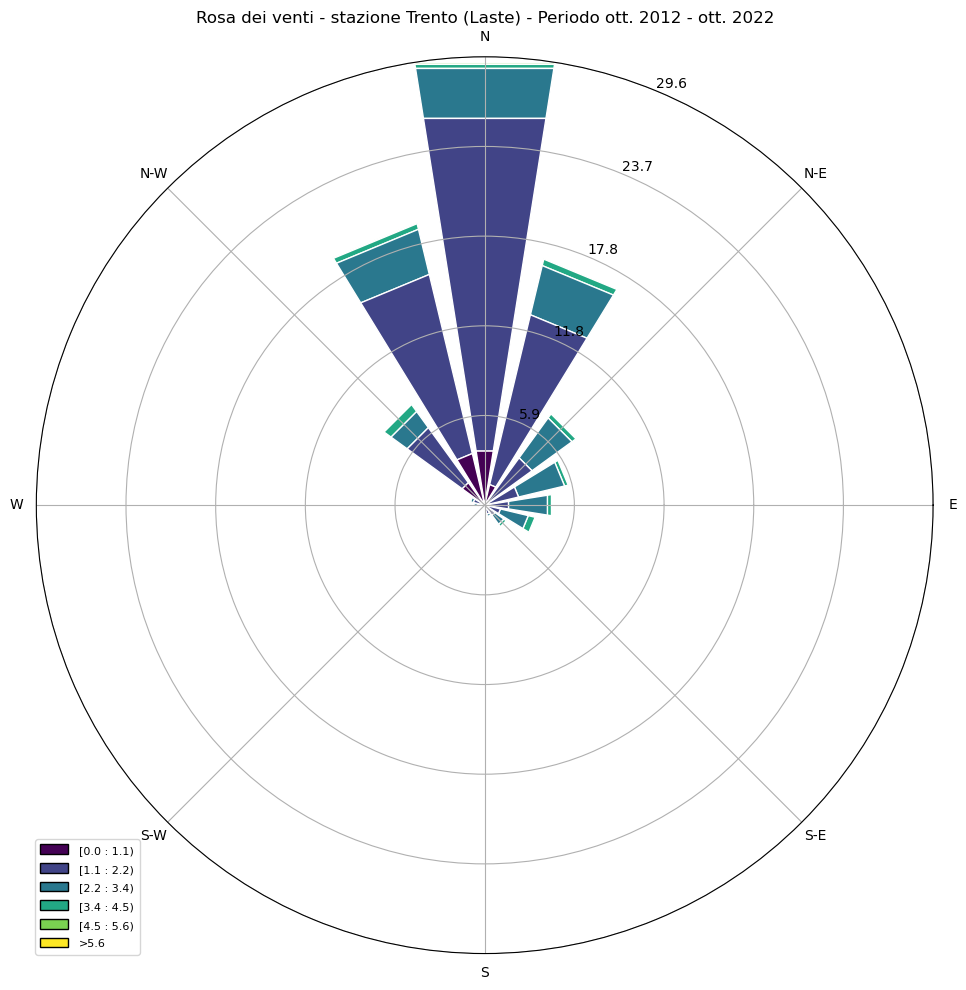

In [4]:
fig= plt.figure(figsize=(10,10), tight_layout=True)
ax = fig.add_subplot(projection="windrose")
#ax = WindroseAxes.from_ax()
ax.bar(df.direction, df.velocity, 
        normed=True, opening=0.8, edgecolor="white", nsector=16)
ax.set_legend()
ax.set_title("Rosa dei venti - stazione Trento (Laste) - Periodo ott. 2012 - ott. 2022")
#fig.savefig("export/windRose.pdf")

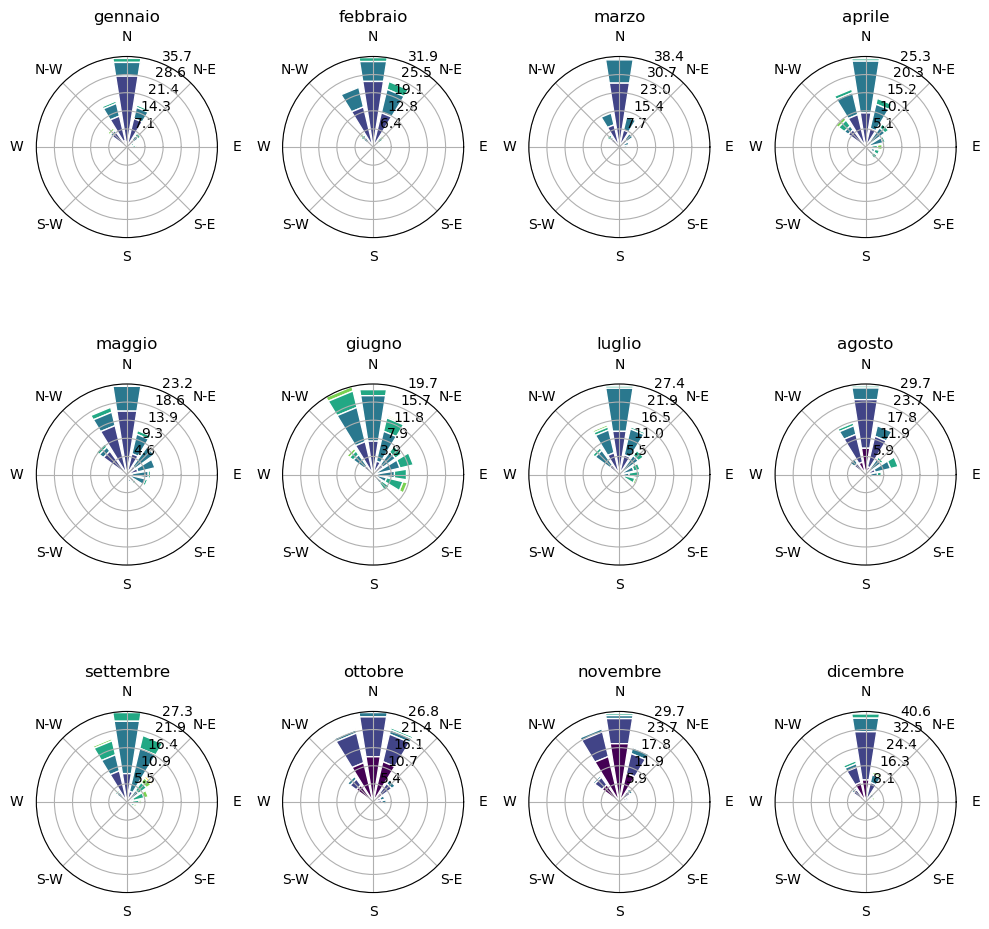

In [66]:
fig = plt.figure(figsize=(10,10), tight_layout=True)
for month in range(1,13):
    ax = fig.add_subplot(3, 4, month, projection="windrose")
    ax.bar(
        df.loc[df.index.month == month].direction, 
        df.loc[df.index.month == month].velocity, 
        normed=True, opening=0.8, edgecolor="white", nsector=16
        )
    ax.set_title(datetime.datetime(year=2022,month=month, day=1).strftime("%B"))
    #ax.set_legend(loc='lower center')
#fig.savefig("export/windRose.pdf")

## Trento Laste 
Periodo 1/1/2011 - 31/12/2021
Valori ogni 10 o 15 minuti

In [121]:
df_vel = pd.read_csv("windRose/t0129_velocita_tutte.csv" , sep=",", index_col=0,
                skiprows=[0,1,2,3], usecols=[0,1,2], parse_dates=True, 
                names=["date","velocity", "quality_velocity"])

df_dir = pd.read_csv("windRose/t0129_direzione_tutte.csv" , sep=",", index_col=0,
                skiprows=[0,1,2,3], usecols=[0,1,2], parse_dates=True, 
                names=["date","direction", "quality_direction"])

df = df_vel.join(df_dir)

df = df.dropna() # remove NaN values
df = df.astype({"quality_velocity":"int64", "quality_direction":"int64"})
df = df.loc[(df.quality_direction == 1) & df.quality_velocity==1] # keep only values where quality factor is 1

df

,velocity,quality_velocity,direction,quality_direction
date,,,,
2011-01-01 00:15:00,0.5,1,3.0,1
2011-01-01 00:30:00,0.2,1,306.0,1
2011-01-01 00:45:00,0.5,1,268.0,1
2011-01-01 01:00:00,0.8,1,13.0,1
2011-01-01 01:15:00,1.0,1,310.0,1
...,...,...,...,...
2021-12-30 23:20:00,2.4,1,354.0,1
2021-12-30 23:30:00,2.2,1,7.0,1
2021-12-30 23:40:00,2.0,1,15.0,1


In [122]:
df.loc[(df.quality_direction != 1) & (df.quality_velocity != 1)]

,velocity,quality_velocity,direction,quality_direction
date,,,,


In [97]:
#df.loc[(df.index.hour >= 6) & (df.index.hour <=8)]

,velocity,quality_velocity,direction,quality_direction
date,,,,
2011-01-01 06:00:00,0.3,1.0,8.0,1.0
2011-01-01 06:15:00,0.0,1.0,33.0,1.0
2011-01-01 06:30:00,0.0,1.0,277.0,1.0
2011-01-01 06:45:00,0.0,1.0,244.0,1.0
2011-01-01 07:00:00,0.2,1.0,307.0,1.0
...,...,...,...,...
2021-12-30 08:10:00,1.7,1.0,26.0,1.0
2021-12-30 08:20:00,2.1,1.0,48.0,1.0
2021-12-30 08:30:00,3.1,1.0,62.0,1.0


In [124]:
df.loc[df.velocity >= 20]

,velocity,quality_velocity,direction,quality_direction
date,,,,
2011-09-18 01:30:00,33.6,1,28.0,1
2011-09-18 01:45:00,23.0,1,317.0,1
2011-09-18 02:00:00,22.2,1,288.0,1
2011-09-18 02:15:00,23.4,1,299.0,1
2011-09-18 02:30:00,21.8,1,345.0,1
2011-09-18 02:45:00,21.4,1,321.0,1
2011-09-18 03:00:00,20.5,1,282.0,1
2011-09-18 03:30:00,25.8,1,336.0,1
2011-09-18 03:45:00,29.4,1,299.0,1


In [228]:
#df.loc[df.velocity >= 7]

,velocity,quality_velocity,direction,quality_direction
date,,,,
2011-01-08 22:30:00,7.7,1,33.0,1
2011-01-10 05:00:00,17.0,1,341.0,1
2011-01-10 05:15:00,7.1,1,350.0,1
2011-01-12 01:30:00,7.7,1,31.0,1
2011-01-12 23:15:00,7.0,1,4.0,1
...,...,...,...,...
2021-10-21 00:50:00,7.2,1,63.0,1
2021-10-21 01:00:00,7.8,1,68.0,1
2021-10-21 01:10:00,7.0,1,67.0,1


Very slow to run:

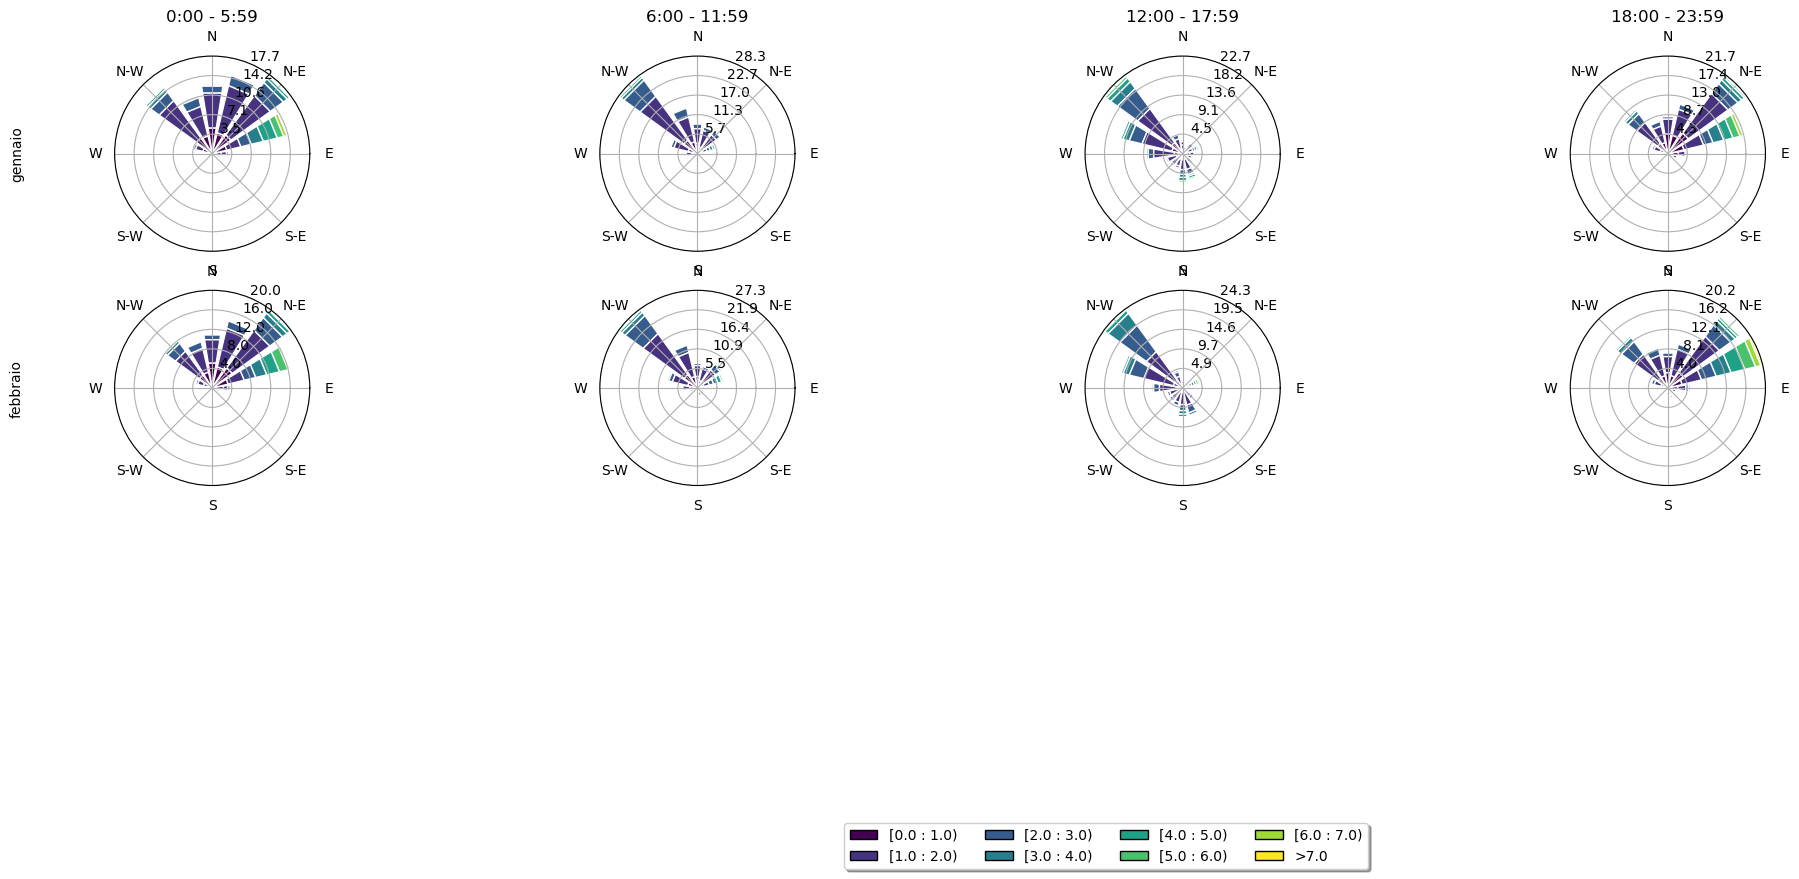

In [130]:
HOUR_RANGES: list[tuple[int]] = [
    ( 0, 6),
    (6, 12),
    (12, 18),
    (18, 24)
    ] # UTC #TODO check if data are really in UTC format

bins = np.arange(0, 7+1, 1)

fig = plt.figure(figsize=(24, 36))
index = 0
for month in range(1,3):
    for hour_range_index in range(len(HOUR_RANGES)):
        index += 1
        ax = fig.add_subplot(12, 4, index, projection="windrose")

        # taking values of that month, excluding values over a certain speed, and betweeen the hour ranges
        df_range = df.loc[
                            (df.index.month == month) 
                            & (df.velocity <= 10)
                            & (df.index.hour>=HOUR_RANGES[hour_range_index][0]) 
                            & (df.index.hour < HOUR_RANGES[hour_range_index][1])
                        ]
        direction = df_range.direction.values
        velocity = df_range.velocity.values

        # the actual subplot
        ax.bar(
                direction, 
                velocity, 
                normed=True, opening=0.8, edgecolor="white", nsector=16, bins=bins
            )

        # text of hour ranges
        if month == 1:
            ax.set_title(f"{HOUR_RANGES[hour_range_index][0]}:00 - {HOUR_RANGES[hour_range_index][1]-1}:59")

        # text of months
        if hour_range_index == 0:
            ax.text(-0.5, 0.5, datetime.datetime(year=2022,month=month, day=1).strftime("%B"), 
            rotation=90, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, # transform is used to use ax cartesian coords, instead of data coords (polar)
            bbox=dict(alpha=1, color="white", pad=0))  
        
# legend only on the last subplot, since each of them as equal bins
ax.legend(loc='lower right',bbox_to_anchor=(-1, -2), #TODO use figure coords with bbox_transform
        fancybox=True, shadow=True, ncol=4)

# adjust space between subplots
#fig.subplots_adjust(wspace=0, hspace=1) 

fig.savefig("export/windRose_test222.pdf")
plt.show()

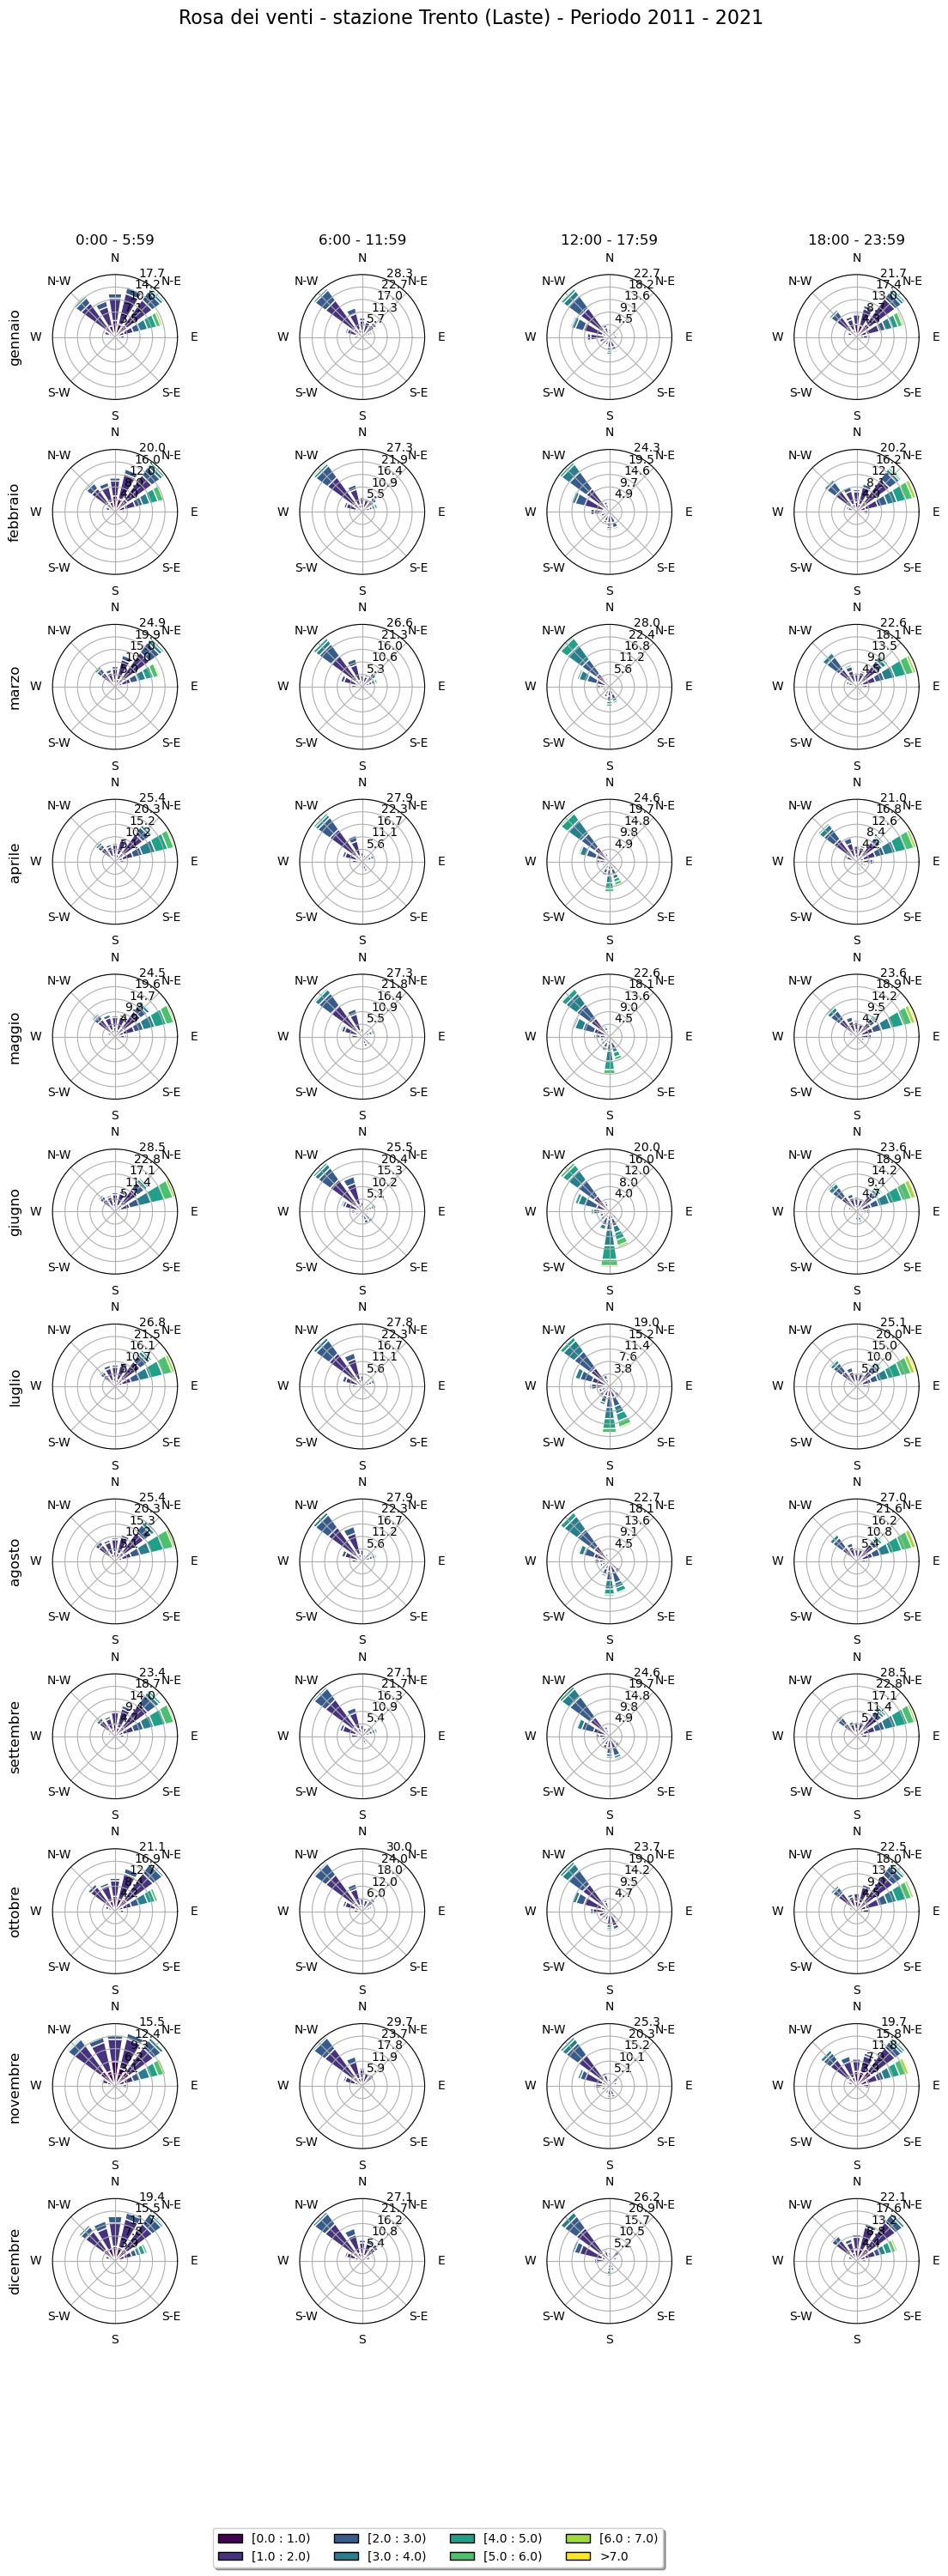

In [158]:
HOUR_RANGES: list[tuple[int]] = [
    ( 0, 6),
    (6, 12),
    (12, 18),
    (18, 24)
    ] # UTC #TODO check if data are really in UTC format

bins = np.arange(0, 7+1, 1)

fig, axs = plt.subplots(12, 4, figsize = (4*3.5,12*3-5), subplot_kw=dict(projection='windrose'))
index = -1
for month in range(1,13):
    for hour_range_index in range(len(HOUR_RANGES)):
        index += 1
        #ax = fig.add_subplot(12, 4, index, projection="windrose")

        # taking values of that month, excluding values over a certain speed, and betweeen the hour ranges
        df_range = df.loc[
                            (df.index.month == month) 
                            & (df.velocity <= 10)
                            & (df.index.hour>=HOUR_RANGES[hour_range_index][0]) 
                            & (df.index.hour < HOUR_RANGES[hour_range_index][1])
                        ]
        direction = df_range.direction.values
        velocity = df_range.velocity.values

        ax = axs[month-1, hour_range_index] # the current subplot

        # the actual subplot
        ax.bar(
                direction, 
                velocity, 
                normed=True, opening=0.8, edgecolor="white", nsector=16, bins=bins
            )

        # text of hour ranges
        if month == 1:
            ax.set_title(f"{HOUR_RANGES[hour_range_index][0]}:00 - {HOUR_RANGES[hour_range_index][1]-1}:59", fontsize=12)

        # text of months
        if hour_range_index == 0:
            ax.text(-0.3, 0.5, datetime.datetime(year=2022,month=month, day=1).strftime("%B"), 
            fontsize=12,
            rotation=90, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, # transform is used to use ax cartesian coords, instead of data coords (polar)
            bbox=dict(alpha=1, color="white", pad=0))  
        
# legend only on the last subplot, since each of them as equal bins
ax.legend(loc='lower right',bbox_to_anchor=(-1, -2), #TODO use figure coords with bbox_transform
        fancybox=True, shadow=True, ncol=4)

# adjust space between subplots
fig.subplots_adjust(wspace=0.3, hspace=.4) 

fig.suptitle("Rosa dei venti - stazione Trento (Laste) - Periodo 2011 - 2021", fontsize=16)
fig.savefig("export/windRose_test223.pdf")
plt.show()

In [ ]:
fig.tit

c:\Users\nicol\miniconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


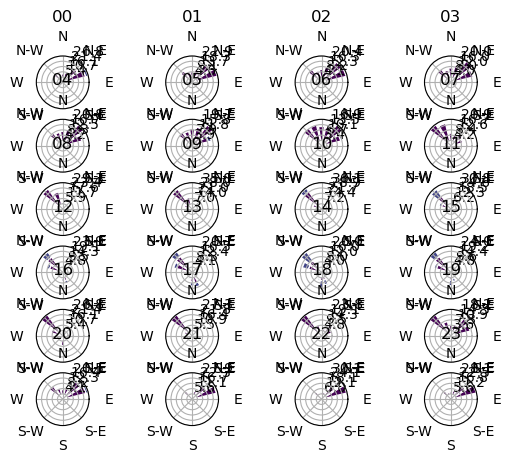

In [158]:
fig = plt.figure(figsize=(21/2.54,29.7/2.54), tight_layout=True)
for hour in range(0,24):
    ax = fig.add_subplot(6, 4, hour+1, projection="windrose")
    ax.bar(
        df.loc[df.index.hour == hour].direction, 
        df.loc[df.index.hour == hour].velocity, 
        normed=True, opening=0.8, edgecolor="white", nsector=16
        )
    ax.set_title(datetime.datetime(year=2022,month=1, day=1, hour=hour).strftime("%H"))